In [1]:
# Import libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4]:
# Step 1: Load Abalone dataset

abalone = pd.read_csv('C:/Users/Matt/OneDrive/Desktop/Predictive Analysis/Week_2/train.csv.zip')
print("First few rows of Abalone dataset:")
print(abalone.head())

First few rows of Abalone dataset:
   id Sex  Length  Diameter  Height  Whole weight  Whole weight.1  \
0   0   F   0.550     0.430   0.150        0.7715          0.3285   
1   1   F   0.630     0.490   0.145        1.1300          0.4580   
2   2   I   0.160     0.110   0.025        0.0210          0.0055   
3   3   M   0.595     0.475   0.150        0.9145          0.3755   
4   4   I   0.555     0.425   0.130        0.7820          0.3695   

   Whole weight.2  Shell weight  Rings  
0          0.1465        0.2400     11  
1          0.2765        0.3200     11  
2          0.0030        0.0050      6  
3          0.2055        0.2500     10  
4          0.1600        0.1975      9  


In [5]:
# Step 2: Preprocessing

# Encode 'Sex' variable
abalone['Sex'] = abalone['Sex'].map({'M': 0, 'F': 1, 'I': 2})

# Drop 'id' column if it exists
if 'id' in abalone.columns:
    abalone = abalone.drop(columns=['id'])

In [7]:
# Step 3: Train/Test Split

X = abalone.drop('Rings', axis=1)
y = abalone['Rings']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Step 4: Model 1 - Simple Linear Regression (Length -> Rings)

model1 = smf.ols('Rings ~ Length', data=abalone).fit()
print("\nModel 1 Summary (Simple Linear Regression):")
print(model1.summary())


Model 1 Summary (Simple Linear Regression):
                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                 5.772e+04
Date:                Sun, 27 Apr 2025   Prob (F-statistic):               0.00
Time:                        13:12:19   Log-Likelihood:            -2.1097e+05
No. Observations:               90615   AIC:                         4.219e+05
Df Residuals:                   90613   BIC:                         4.220e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Interce

In [9]:
# Step 5: Model 2 - Multiple Linear Regression (All features)

model2 = sm.OLS(y_train, sm.add_constant(X_train)).fit()
print("\nModel 2 Summary (Multiple Linear Regression):")
print(model2.summary())


Model 2 Summary (Multiple Linear Regression):
                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                 1.384e+04
Date:                Sun, 27 Apr 2025   Prob (F-statistic):               0.00
Time:                        13:12:34   Log-Likelihood:            -1.5286e+05
No. Observations:               72492   AIC:                         3.057e+05
Df Residuals:                   72483   BIC:                         3.058e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

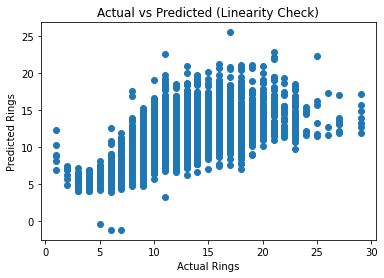

In [10]:
# Step 6: Assumption Checks

# Linearity: Plot actual vs predicted
plt.figure(figsize=(6,4))
plt.scatter(y_test, model2.predict(sm.add_constant(X_test)))
plt.xlabel('Actual Rings')
plt.ylabel('Predicted Rings')
plt.title('Actual vs Predicted (Linearity Check)')
plt.show()

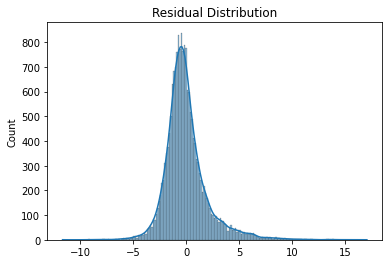

In [11]:
# Residual Distribution
residuals = y_test - model2.predict(sm.add_constant(X_test))
sns.histplot(residuals, kde=True)
plt.title('Residual Distribution')
plt.show()

In [12]:
# Independence (Durbin-Watson test)
from statsmodels.stats.stattools import durbin_watson
dw = durbin_watson(residuals)
print(f"\nDurbin-Watson statistic (Independence of errors): {dw:.2f}")



Durbin-Watson statistic (Independence of errors): 2.02


In [13]:
# Collinearity (VIF)
vif_data = pd.DataFrame()
vif_data['feature'] = X_train.columns
vif_data['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
print("\nVariance Inflation Factors (VIF):")
print(vif_data)


Variance Inflation Factors (VIF):
          feature         VIF
0             Sex    2.994273
1          Length  925.150235
2        Diameter  964.951230
3          Height  100.075164
4    Whole weight  272.942335
5  Whole weight.1   80.598417
6  Whole weight.2   76.157546
7    Shell weight   71.804434


In [38]:
# Step 7: Kaggle Submission File Creation (Final Fix)

# Load Kaggle test set
kaggle_test = pd.read_csv('C:/Users/Matt/OneDrive/Desktop/Predictive Analysis/Week_2/test.csv.zip')

# Encode 'Sex' variable like you did for training
kaggle_test['Sex'] = kaggle_test['Sex'].map({'M': 0, 'F': 1, 'I': 2})

# Make sure Kaggle test data has the SAME COLUMNS as training data
X_kaggle_test = kaggle_test[X_train.columns]  # <-- align columns to training set

# Predict using your second model (multiple linear regression)
kaggle_predictions = model2.predict(sm.add_constant(X_kaggle_test))

# Create submission DataFrame
submission = pd.DataFrame({
    'Id': range(len(kaggle_test)),   # Create Ids 0, 1, 2, ...
    'Rings': kaggle_predictions.round().astype(int)  # Round predictions
})

# Save the submission file
submission.to_csv('kaggle_submission.csv', index=False)

print("\nFinal submission file saved as 'kaggle_submission.csv'. Upload this to Kaggle!")






Final submission file saved as 'kaggle_submission.csv'. Upload this to Kaggle!
